# TD6 Biochemical Programming

* CRN synthesis from
 * GPAC circuits
 * PIVP definitions of functions of time
 * PIVP definitions of input/output functions
* Trigonometric functions for oscillators
* Sigmoid functions for switches

F. Fages, Feb. 2019, 2020

# GPAC generating cosine(t)

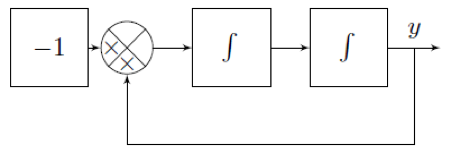

In [1]:
compile_wgpac(y::integral integral-1*y).

In [2]:
present(y,1).

In [3]:
list_model.

fast*[x2]*[y] for x2+y=>x1+x2+y.
fast*[x1] for x1=>_.
MA(1) for x1=>x0+x1.
MA(1) for x0=>y+x0.
present(x2,-1).
present(y,1).
parameter(
  fast = 1000
).


In [4]:
list_ode.

In [5]:
numerical_simulation.

In [6]:
plot.

In [ ]:
plot(against:y).

# PIVP generation of cosine(time)

In [8]:
clear_model.

In [9]:
compile_from_expression(cos, time, f).

In [10]:
list_model.

fast*f_p*f_m for f_p+f_m=>_.
fast*A_p*A_m for A_p+A_m=>_.
MA(1) for A_p=>f_p+A_p.
MA(1) for A_m=>f_m+A_m.
MA(1) for f_m=>A_p+f_m.
MA(1) for f_p=>A_m+f_p.
present(f_p,1).
parameter(
  fast = 1000
).


In [11]:
search_conservations.

No complex invariant found


In [12]:
list_ode.

In [13]:
numerical_simulation.

In [14]:
plot.

In [ ]:
plot(against:A_p).

In [ ]:
plot(against:A_m).

In [17]:
numerical_simulation(method:ssa).

In [18]:
plot.

In [ ]:
plot(against:A_p).

# PIVP computation of cosine(x)

In [20]:
clear_model.

In [21]:
compile_from_expression(cos, x, y).

In [22]:
parameter(input=4).

In [23]:
list_model.

fast*y_p*y_m for y_p+y_m=>_.
fast*A_p*A_m for A_p+A_m=>_.
MA(1) for A_p+x=>y_p+A_p+x.
MA(1) for A_m+x=>y_m+A_m+x.
MA(1) for y_m+x=>A_p+y_m+x.
MA(1) for y_p+x=>A_m+y_p+x.
MA(1) for x=>_.
present(y_p,1).
present(x,input).
parameter(
  fast = 1000,
  input = 4
).


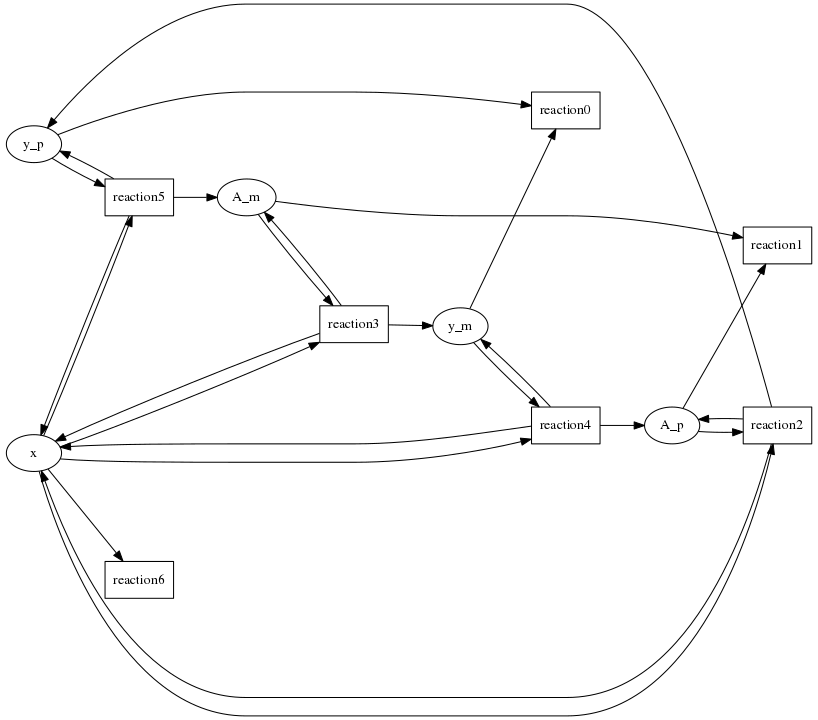

In [24]:
draw_reactions.

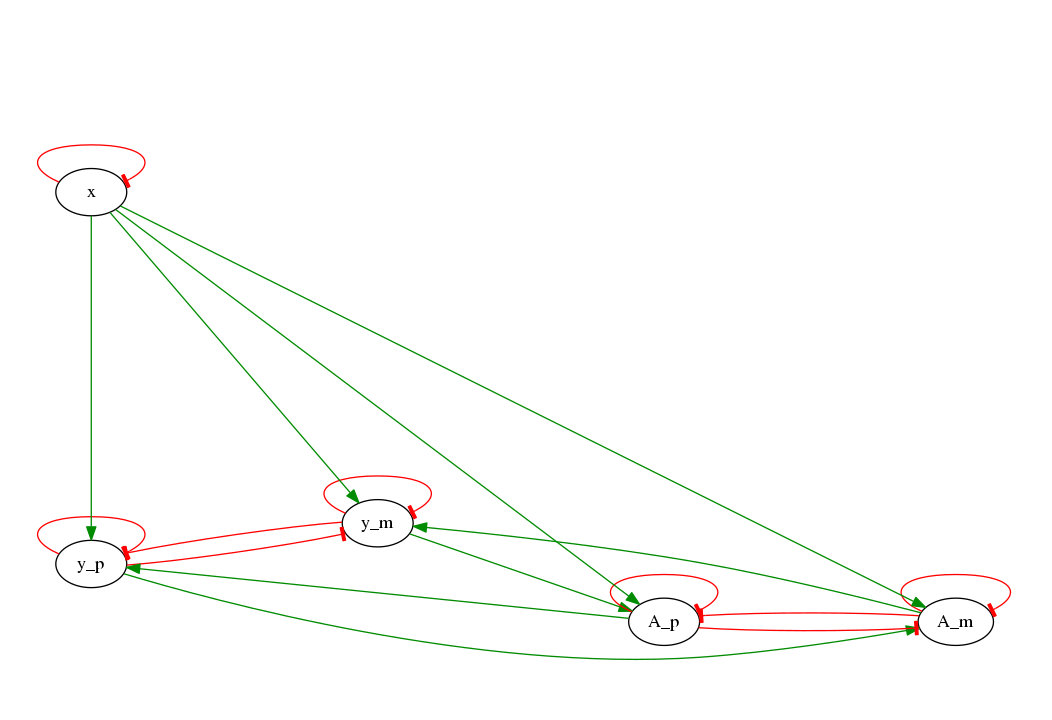

In [25]:
draw_influences.

In [26]:
list_ode.

In [27]:
numerical_simulation.

In [28]:
plot.

# Verification of dynamical properties (teasing for next course)
## Quantitative temporal logic FO-Linear Time Logic with linear constraints

* linear constraints on states involving free variables, molecular concentrations and parameters

* temporal operators:

* F "finally" at some time point in the future (state reachability)

* G "globally" at all time points in the future (state stability)

In [29]:
validity_domain(F(G(y_m=v))). % value v of reachable stable state

v=0.653644


In [30]:
validity_domain(F(((y_m > 6e-1) /\ (Time < t)))). % with time information

t>1.00391


In [31]:
satisfaction_degree(F(G(y_m=v)), [v -> 0.653644]).

1.000000


## Robustness  and parameter sensitivity (teasing for next course)

## Parametrization of the model
* introduce kinetic parameters for all reactions

In [32]:
parametrize.

In [33]:
list_model.

fast*y_p*y_m for y_p+y_m=>_.
fast*A_p*A_m for A_p+A_m=>_.
MA(k_2) for A_p+x=>y_p+A_p+x.
MA(k_3) for A_m+x=>y_m+A_m+x.
MA(k_4) for y_m+x=>A_p+y_m+x.
MA(k_5) for y_p+x=>A_m+y_p+x.
MA(k_6) for x=>_.
present(x,input).
present(y_p,k_1).
parameter(
  fast = 1000,
  input = 4,
  k_1 = 1,
  k_2 = 1,
  k_3 = 1,
  k_4 = 1,
  k_5 = 1,
  k_6 = 1
).


In [34]:
numerical_simulation. plot.

### Extrinsic variability
* variability of satisfaction degree with respect to parameter variation
* robustness analysis (variation of several parameters)
* sensitivity analysis (variation of one parameter or pairs of parameters)

In [35]:
robustness(F(G(y_m=v)), [k_1, k_2, k_3, k_4, k_5, k_6], [v -> 0.653644]).

Time: 3.603 s
Robustness degree: 0.795327


### Intrinsic variability
* variability with respect to stochasticity
* robustness analysis with respect to both extrinsic and intrinsic noise

In [36]:
option(method:ssa). 

In [37]:
numerical_simulation. plot.

In [38]:
validity_domain(F(G(y_m=v))).

v=69


In [ ]:
robustness(F(G(y_m=v)), [k_1, k_2, k_3, k_4, k_5, k_6], [v -> 65]).

# Sigmoid functions as switches
* various sigmoid functions of time

In [34]:
clear_model.

# Logistic function $S(t) = 1/(1+e^{-t})$
$S(t)=e^t/(1+e^t)$

${\displaystyle {\frac {d}{dt}}S(t)={\frac {e^{t}\cdot (1+e^{t})-e^{t}\cdot e^{t}}{(1+e^{t})^{2}}}={\frac {e^{t}}{(1+e^{t})^{2}}}=S(t)(1-S(t))}$

$S'(t) = S(t) - S(t)^2$

In [35]:
S => 2*S.

In [36]:
S =[S]=> _.

In [37]:
present(S,0.5).

In [38]:
list_ode.

# Hyperbolic tangent $HT'(t)=1-HT(t)^2$

In [39]:
_ => HT.

In [40]:
2*HT => HT.

In [41]:
list_ode.

# Arc tangent $AT'(t)=1/(1+t^2)$

In [42]:
_ => T.

In [43]:
1/(1+T^2) for / T => AT.

In [44]:
list_ode.

# Hill function degree 1, $H1=t/(1+t)$

$NH1=1/(1+t)$

$H1'=NH1^2(t)$

$NH1'=-NH1^2(t)$

In [45]:
MA(1) for 2*NH1 => NH1.

In [46]:
MA(1) for 2*NH1 => 2*NH1+H1.

In [47]:
present(NH1,1).

In [48]:
list_ode.

# Hill function degree 2, $H2=t^2/(1+t^2)$
$NH2=1/(1+t^2)$

$H2'=t.NH2^2(t)$

$NH2'=-2.t.NH2^2(t)$

In [49]:
MA(2) for T+2*NH2 => T+NH2.

In [50]:
MA(2) for T+2*NH2 => T+2*NH2+H2.

In [51]:
present(NH2,1).

# Hill function degree 5, $H5=t^5/(1+t^5)$
$NH5=1/(1+t^5)$

$H5'=t^4.NH2^5(t)$

$NH5'=-5.t^4.NH5^5(t)$

In [52]:
MA(5) for 4*T+2*NH5 => 4*T+NH5.

In [53]:
MA(5) for 4*T+2*NH5 => 4*T+2*NH5+H5.

In [54]:
present(NH5,1).

# Hill function degree n $Hn=t^n/(k^n+t^n)$

 `MA(n) for NHn =[(n-1)*t+NHn]=> _.`

 `MA(n*k^n) for _ =[(n-1)*t+2*NHn]=> Hn.`

 `present(NHn,1/k^n).`

# Simulations

In [55]:
list_model.

'MA'(1) for S=>2*S.
'MA'(1) for 2*S=>S.
'MA'(1) for _=>HT.
'MA'(1) for 2*HT=>HT.
'MA'(1) for _=>T.
1/(1+T^2) for '/T'=>AT.
'MA'(1) for 2*NH1=>NH1.
'MA'(1) for 2*NH1=>H1+2*NH1.
'MA'(2) for 2*NH2+T=>T+NH2.
'MA'(2) for T+2*NH2=>H2+T+2*NH2.
'MA'(5) for 2*NH5+4*T=>4*T+NH5.
'MA'(5) for 4*T+2*NH5=>H5+4*T+2*NH5.
present(S,0.5).
present(NH1,1).
present(NH2,1).
present(NH5,1).


In [56]:
list_ode.

In [61]:
option(method:rsbk). numerical_simulation.

In [62]:
plot(show:{S,HT,AT,H1,H2,H5}).

In [63]:
numerical_simulation(method:ssa).

In [64]:
plot(show:{S,HT,AT,H1,H2,H5}).

# Questions

## 0) what is your favorite sigmoid function ?


## 1) redefine Hill5 with a parameter k for the switching time
* play with that parameter with a slider

## 2) Quantify the sensitivity of the switching time to parameter k (extrinsic noise)

## 3) Quantify the sensitivity to parameter k with both extrinsic and intrinsic noise